In [54]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

In [38]:
data = pd.read_csv('amazon.csv', encoding='latin1')
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [39]:
data.shape

(6454, 5)

In [40]:
data.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [41]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])

In [42]:
data2.shape

(5837, 5)

In [43]:
forest_fire_per_month = data2.groupby('month')['number'].sum()

<AxesSubplot:xlabel='month'>

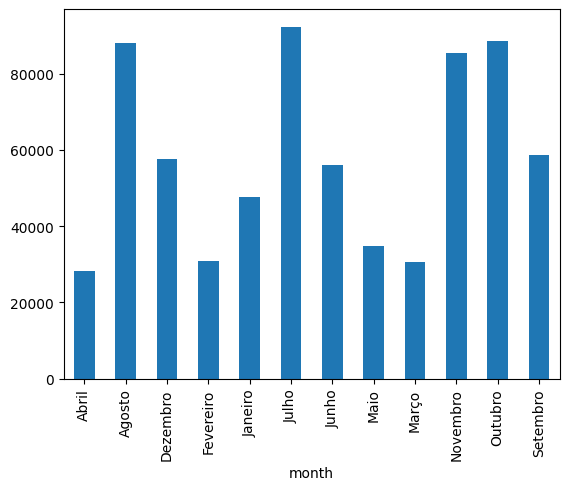

In [44]:
forest_fire_per_month.plot(kind='bar')

In [45]:
months_unique = list(data['month'].unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)

In [46]:
months_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [47]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [48]:
forest_fire_per_month.head()

,number
month,
Janeiro,47747.844
Fevereiro,30848.050
Março,30717.405
Abril,28188.770
Maio,34731.363


In [49]:
forest_fire_per_month.reset_index(inplace=True)

In [50]:
forest_fire_per_month.head()

,month,number
0,Janeiro,47747.844
1,Fevereiro,30848.050
2,Março,30717.405
3,Abril,28188.770
4,Maio,34731.363


[None, None, None, None, None, None, None, None, None, None, None, None]

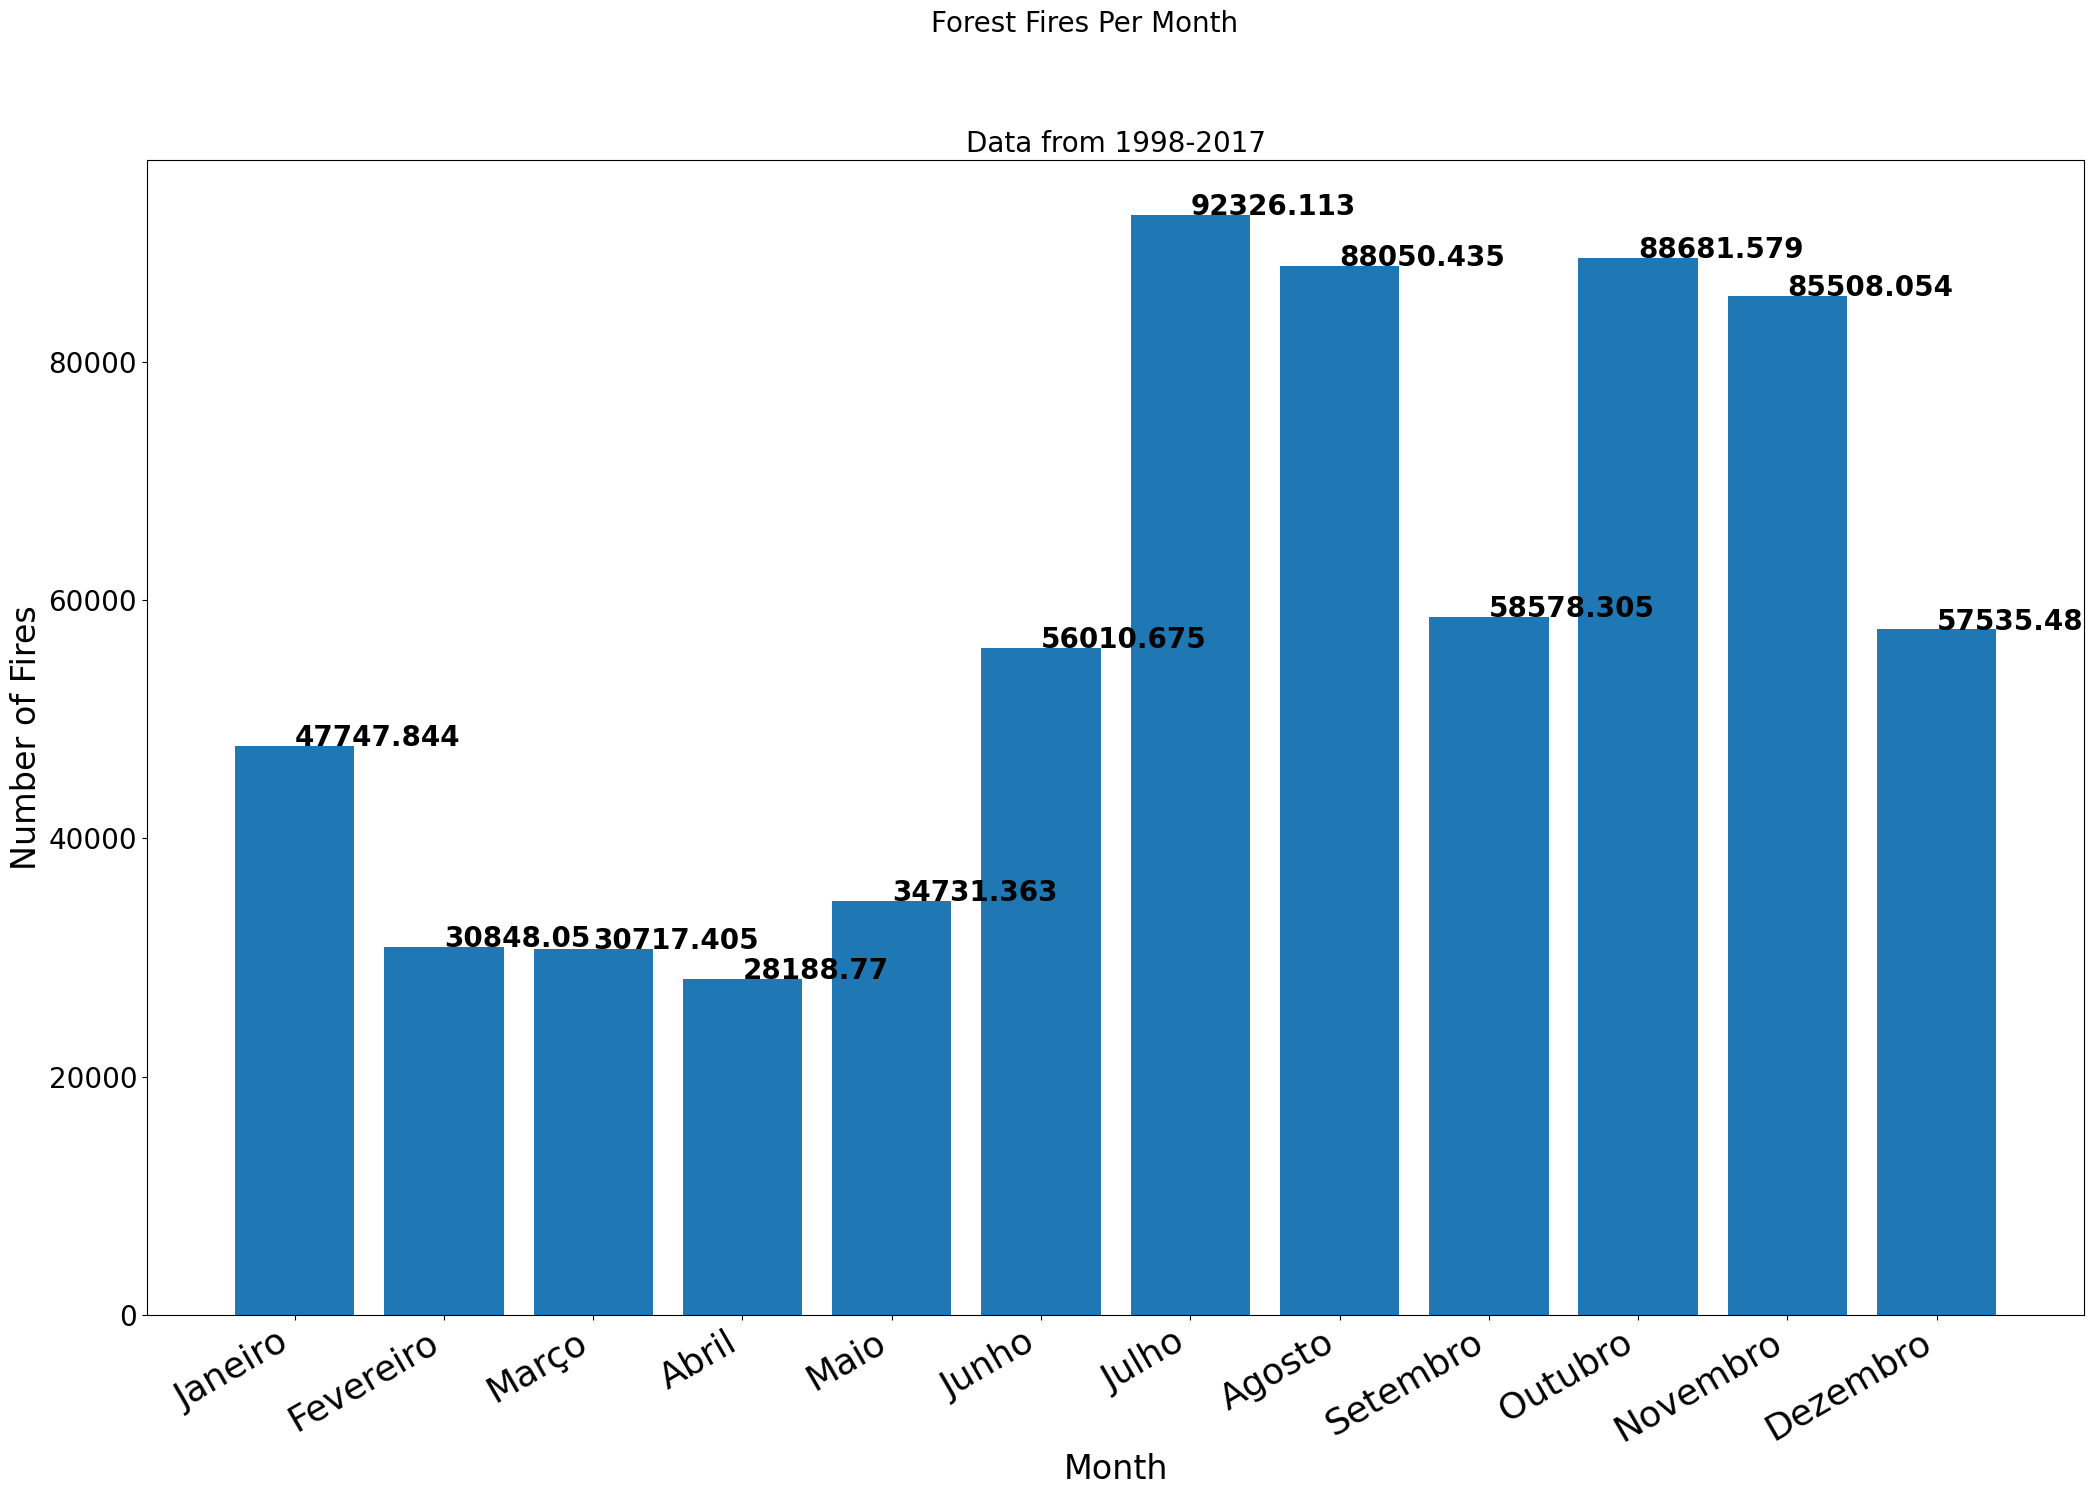

In [63]:
plt.figure(figsize=(25,15))

plt.bar(forest_fire_per_month['month'], forest_fire_per_month['number']),
color = 'blue'

plt.suptitle('Forest Fires Per Month', fontsize=20)
plt.title('Data from 1998-2017', fontsize=20)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Number of Fires', fontsize=24)

for i, v in enumerate(forest_fire_per_month['number']):
    plt.text(i, v, str(v), color='black', fontweight='bold',
             fontsize=20)

plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=26)

plt.setp(plt.gca().get_yticklabels(), fontsize=20)